## Pre Set

In [172]:
# Importing necessary libraries:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on matplotlib
import plotly  # Plotly to connect to the Plotly CDN for additional resources if needed.
plotly.offline.init_notebook_mode(connected = True)
# Import the os module for interacting with the operating system
import os
import plotly.express as px
# Get the current working directory and store it in a variable
current_folder_path = os.getcwd()
print("Current folder path:", current_folder_path)

# Define the name of the file to be used
file_name = "CleanedUp Most Streamed Spotify Songs 2024.csv"
# Create the full file path by joining the current folder path with the file name
full_file_path = os.path.join(current_folder_path, file_name)
print("Full file path:", full_file_path)

# Read the CSV file from the specified path into a pandas DataFrame
spotify_filled_data = pd.read_csv(full_file_path, encoding='ISO-8859-1')
print("Spotify data frame information:")
spotify_filled_data.info()

Current folder path: C:\Users\manju\Documents\Spotify-EDA
Full file path: C:\Users\manju\Documents\Spotify-EDA\CleanedUp Most Streamed Spotify Songs 2024.csv
Spotify data frame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559 entries, 0 to 4558
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4559 non-null   object 
 1   Album Name                  4559 non-null   object 
 2   Artist                      4559 non-null   object 
 3   Release Date                4559 non-null   object 
 4   ISRC                        4559 non-null   object 
 5   All Time Rank               4559 non-null   int64  
 6   Track Score                 4559 non-null   float64
 7   Spotify Streams             4559 non-null   int64  
 8   Spotify Playlist Count      4559 non-null   int64  
 9   Spotify Playlist Reach      4559 non-null   int64  
 10  Spotify Popula

#  4. Exploratory Data Analysis (EDA)

### i. Descriptive Statistics:

#### Provide summary statistics for numerical columns (mean, median, standard deviation, etc.).

In [24]:
# Calculate summary statistics with additional measures such as median
summary_statistics = spotify_filled_data.describe().T  # Transpose for better readability

summary_statistics['median'] = spotify_filled_data.select_dtypes(include=['number']).median()  # Add median column
# Select only the required columns for the summary statistics
summary_statistics = summary_statistics[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']]

print("summary_statistics: \n")
summary_statistics # Display the summary statistics

summary_statistics: 



count          mean       median           std  \
All Time Rank               4559.0  2.292348e+03       2292.0  1.324594e+03   
Track Score                 4559.0  4.187311e+01         29.9  3.866682e+01   
Spotify Streams             4559.0  4.342316e+08  224285122.0  5.353935e+08   
Spotify Playlist Count      4559.0  5.884456e+04      31737.0  7.106720e+04   
Spotify Playlist Reach      4559.0  2.310463e+07   13000565.0  2.962775e+07   
Spotify Popularity          4559.0  5.263610e+01         65.0  2.812239e+01   
YouTube Views               4559.0  3.780021e+08  129735943.0  6.875898e+08   
YouTube Likes               4559.0  2.743013e+06    1081402.0  4.505427e+06   
TikTok Posts                4559.0  7.075050e+05      66399.0  2.151948e+06   
TikTok Likes                4559.0  8.926719e+07   13089939.0  4.919765e+08   
TikTok Views                4559.0  9.198612e+08  129969428.0  5.260431e+09   
YouTube Playlist Reach      4559.0  2.686626e+08   31086179.0  6.086605e+08   
Apple Music Playlist Count  4559.0  4.789186e+01         21.0  6.959314e+01   
AirPlay Spins               4559.0  4.856348e+04       3440.0  1.208018e+05   
SiriusXM Spins              4559.0  1.395955e+02          4.0  4.284426e+02   
Deezer Playlist Count       4559.0  2.597697e+01          9.0  5.039563e+01   
Deezer Playlist Reach       4559.0  1.033707e+06     125171.0  3.211134e+06   
Amazon Playlist Count       4559.0  1.961856e+01         11.0  2.520443e+01   
Pandora Streams             4559.0  6.557393e+07    3073921.0  1.513806e+08   
Pandora Track Stations      4559.0  6.405926e+04       2091.0  2.262616e+05   
Shazam Counts               4559.0  2.227244e+06     620606.0  5.730958e+06   
Explicit Track              4559.0  3.612634e-01          0.0  4.804194e-01   

                             min         25%          50%           75%  \
All Time Rank                1.0      1144.5       2292.0  3.440000e+03   
Track Score                 19.4        23.3         29.9  4.445000e+01   
Spotify Streams              0.0  62201054.5  224285122.0  6.097083e+08   
Spotify Playlist Count       0.0      6185.5      31737.0  8.545500e+04   
Spotify Playlist Reach       0.0   4611434.0   13000565.0  2.943144e+07   
Spotify Popularity           0.0        45.0         65.0  7.100000e+01   
YouTube Views                0.0  29024719.0  129735943.0  4.228910e+08   
YouTube Likes                0.0    296615.0    1081402.0  3.361514e+06   
TikTok Posts                 0.0         0.5      66399.0  4.662475e+05   
TikTok Likes                 0.0    113749.0   13089939.0  6.795262e+07   
TikTok Views                 0.0   1323084.5  129969428.0  6.406770e+08   
YouTube Playlist Reach       0.0     65010.0   31086179.0  2.331095e+08   
Apple Music Playlist Count   0.0         6.0         21.0  6.000000e+01   
AirPlay Spins                0.0       124.0       3440.0  3.612250e+04   
SiriusXM Spins               0.0         0.0          4.0  1.040000e+02   
Deezer Playlist Count        0.0         1.0          9.0  3.000000e+01   
Deezer Playlist Reach        0.0      3170.5     125171.0  6.112280e+05   
Amazon Playlist Count        0.0         1.0         11.0  2.800000e+01   
Pandora Streams              0.0      1449.5    3073921.0  4.744199e+07   
Pandora Track Stations       0.0         0.0       2091.0  2.397200e+04   
Shazam Counts                0.0    111931.0     620606.0  2.256272e+06   
Explicit Track               0.0         0.0          0.0  1.000000e+00   

                                     max  
All Time Rank               4.998000e+03  
Track Score                 7.254000e+02  
Spotify Streams             4.281469e+09  
Spotify Playlist Count      5.903920e+05  
Spotify Playlist Reach      2.623434e+08  
Spotify Popularity          9.600000e+01  
YouTube Views               1.632276e+10  
YouTube Likes               6.231118e+07  
TikTok Posts                4.290000e+07  
TikTok Likes                2.347422e+10  
TikTok Views

#### Provide summary statistics for categorical columns (frequency counts,  unique values, etc.).

In [27]:
# Select only categorical columns
categorical_columns = spotify_filled_data.select_dtypes(include=['object'])

# Create a summary of categorical columns (unique values, top frequency, and top value)
categorical_summary = categorical_columns.apply(lambda col: pd.Series({
    'count' : col.count(),
    'unique': col.nunique(),
    'top': col.mode()[0],  # Most frequent value (mode)
    'frequency': col.value_counts().iloc[0]  # Frequency of the most frequent value
}))

# Display the summary for categorical columns
categorical_summary

Track        Album Name        Artist Release Date  \
count                      4559              4559          4559         4559   
unique                     4370              4005          2000         1557   
top        Danza Kuduro - Cover  Un Verano Sin Ti  Taylor Swift   2012-01-01   
frequency                    13                20            61           38   

                   ISRC  
count              4559  
unique             4559  
top        AEA0D2036458  
frequency             1

### ii. Data Visualization:

In [210]:
numeric_columns = spotify_filled_data.select_dtypes(include=['int64', 'float64', 'Int64']).columns
labels_to_remove = ['All Time Rank', 'Explicit Track']
numeric_columns = numeric_columns.difference(labels_to_remove)
numeric_columns

Index(['AirPlay Spins', 'Amazon Playlist Count', 'Apple Music Playlist Count',
       'Deezer Playlist Count', 'Deezer Playlist Reach', 'Pandora Streams',
       'Pandora Track Stations', 'Shazam Counts', 'SiriusXM Spins',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'Spotify Streams', 'TikTok Likes', 'TikTok Posts',
       'TikTok Views', 'Track Score', 'YouTube Likes',
       'YouTube Playlist Reach', 'YouTube Views'],
      dtype='object')

#### > Create histograms or density plots for numerical features to understand their distributions.

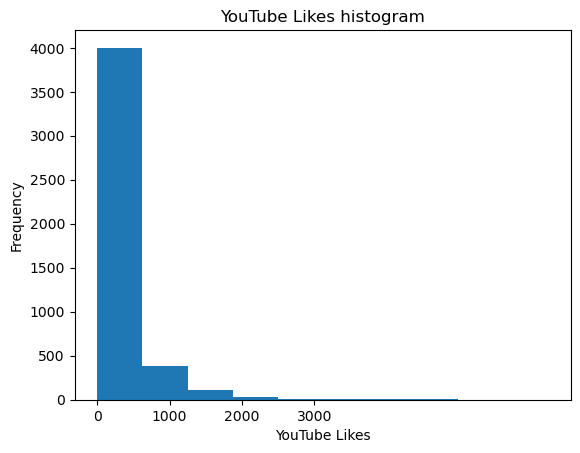

In [52]:
spotify_filled_data['YouTube Likes'].plot.hist()
plt.title("YouTube Likes histogram")
plt.xlabel('YouTube Likes')
plt.ylabel('Frequency')

tick_positions = [0, 1e7, 2e7, 3e7]
tick_labels = ['0', '1000', '2000', '3000']
# Apply custom ticks
plt.xticks(ticks=tick_positions, labels=tick_labels)

plt.show()

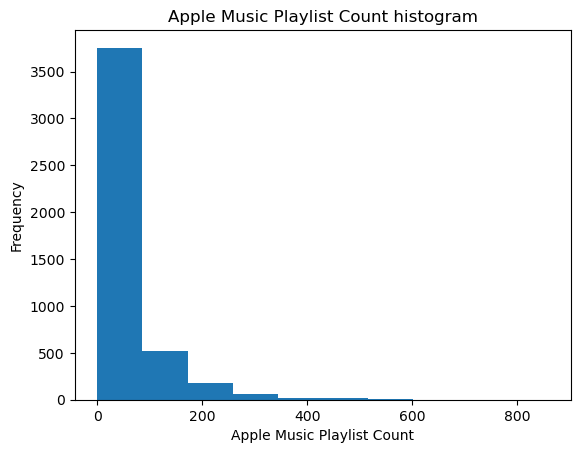

In [54]:
spotify_filled_data['Apple Music Playlist Count'].plot.hist()
plt.title("Apple Music Playlist Count histogram")
plt.xlabel('Apple Music Playlist Count')
plt.ylabel('Frequency')
plt.show()

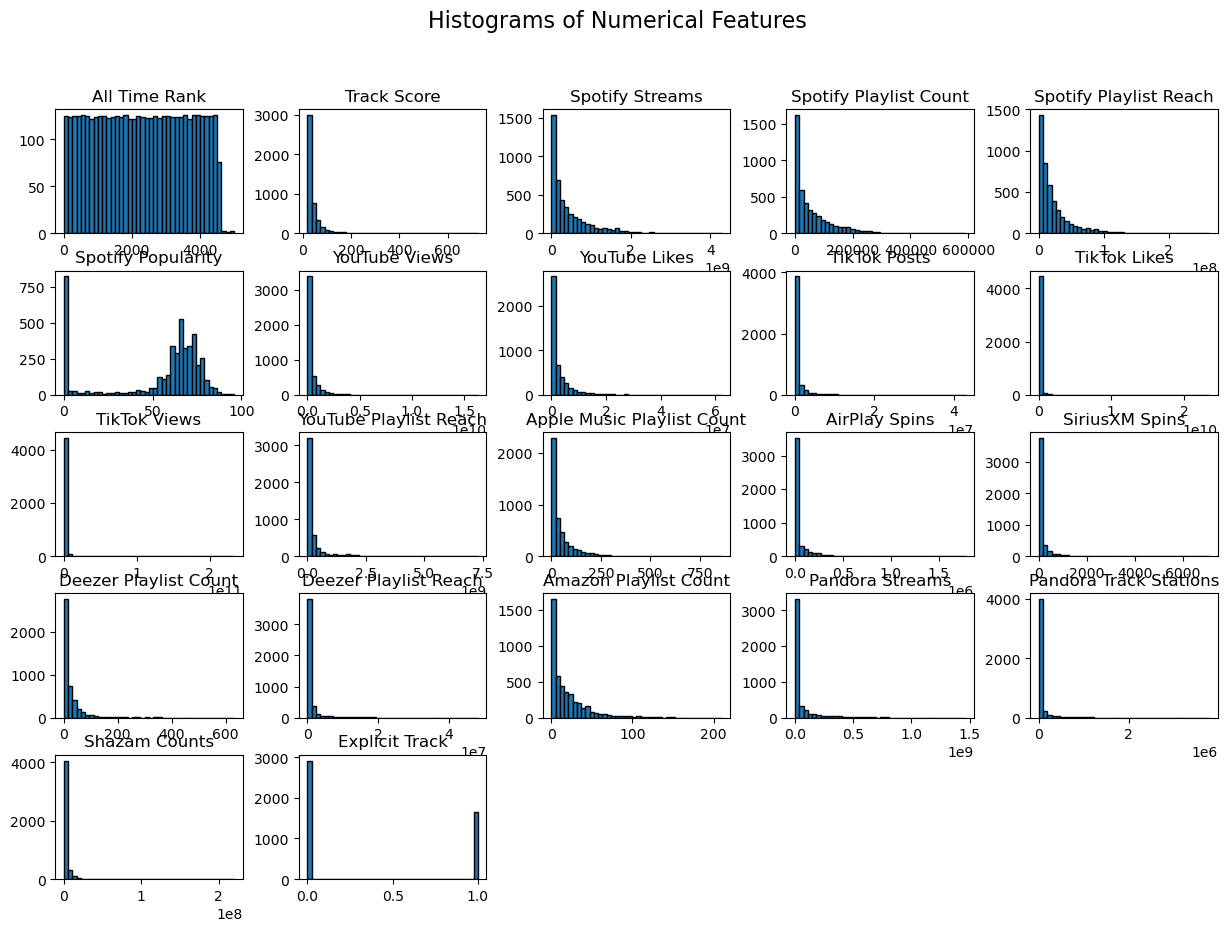

In [212]:
# Create histograms for numerical features
numerical_columns.hist(bins=40, figsize=(15, 10), grid=False, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

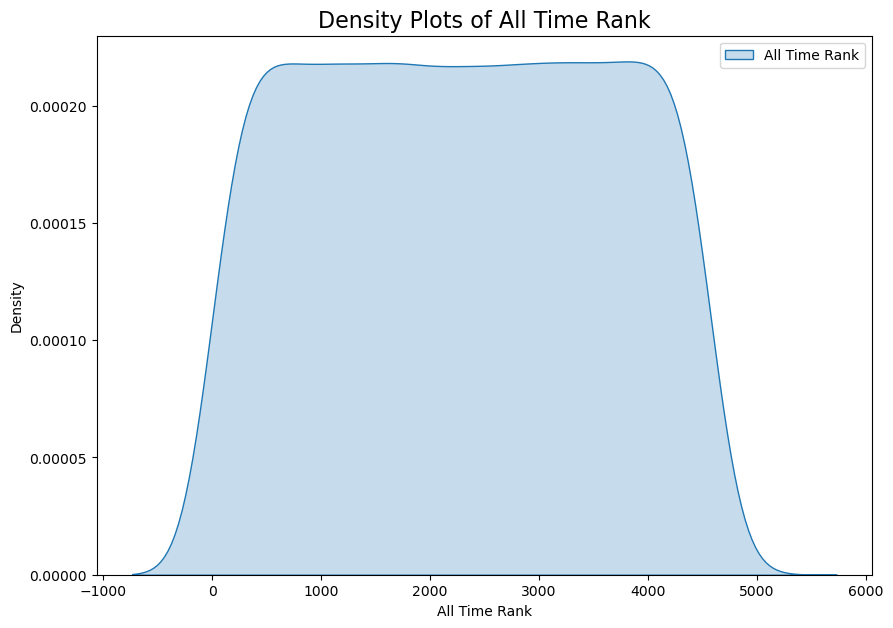

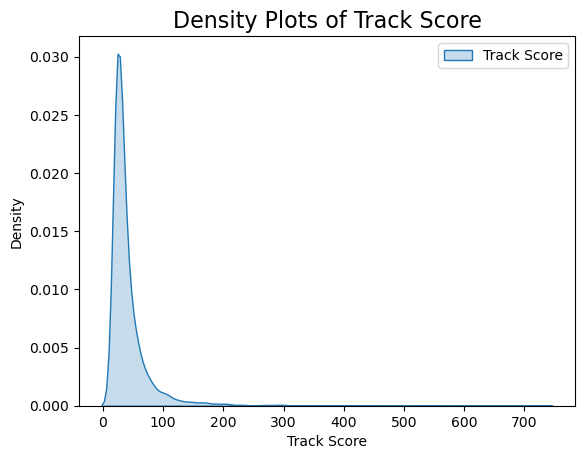

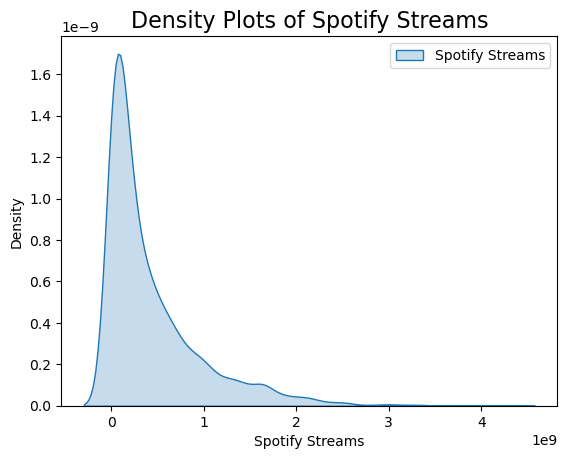

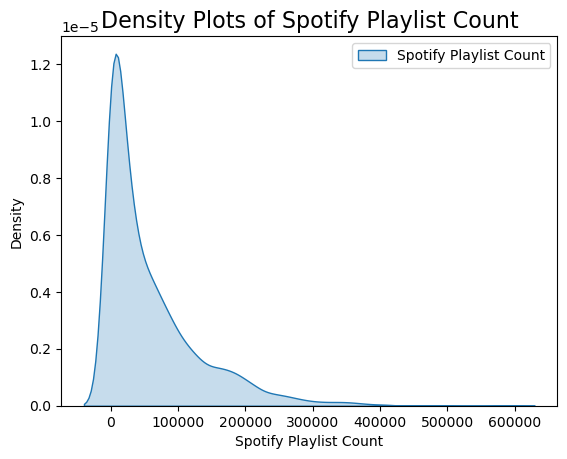

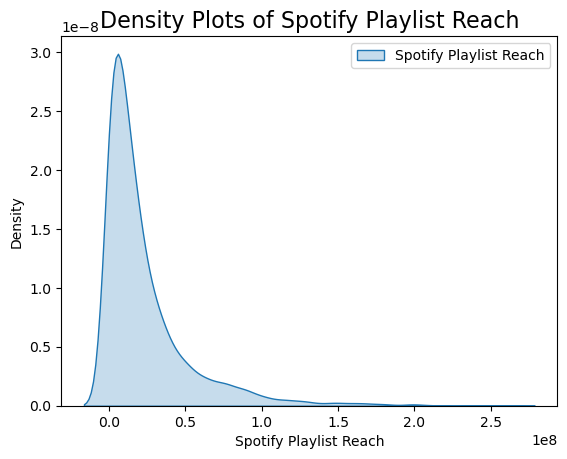

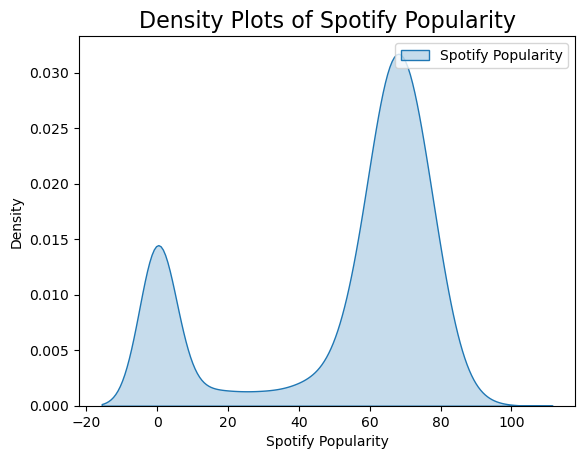

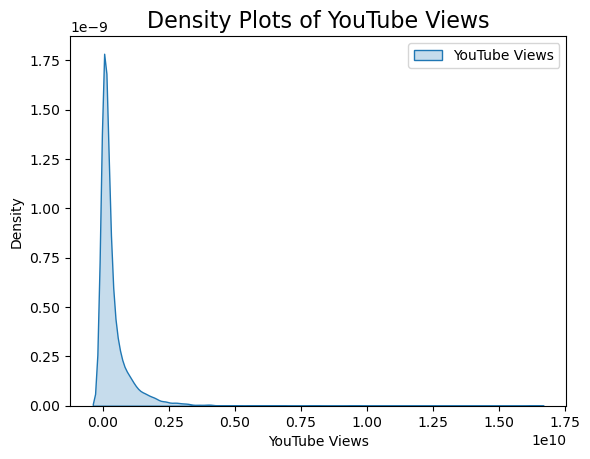

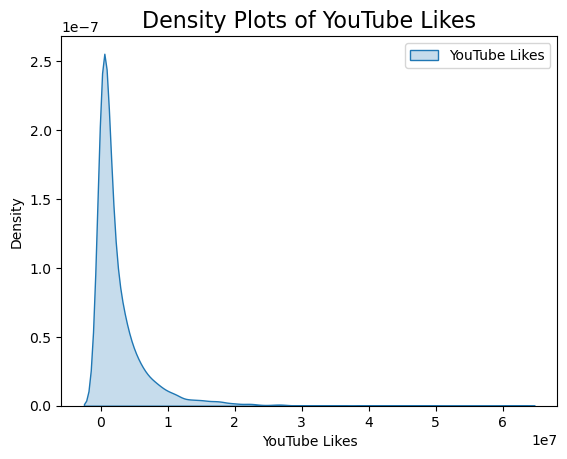

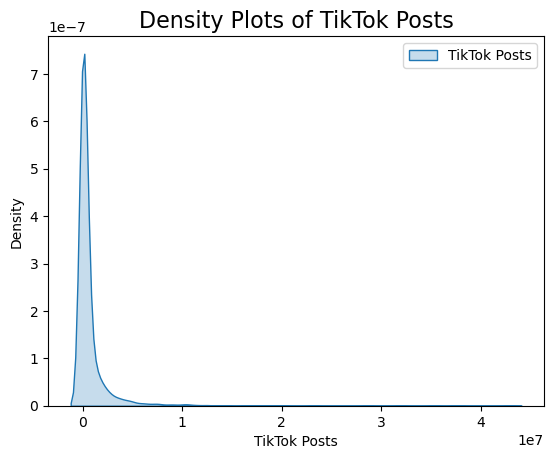

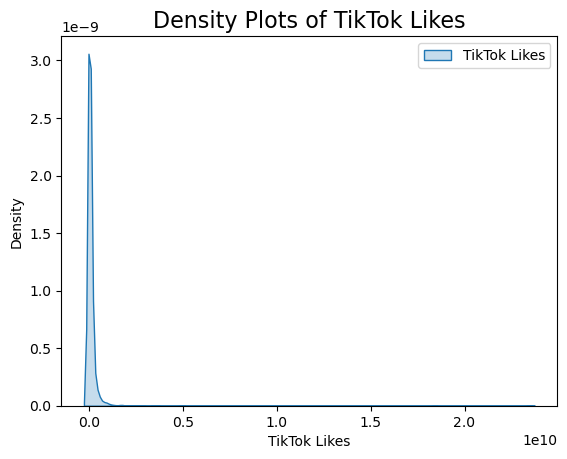

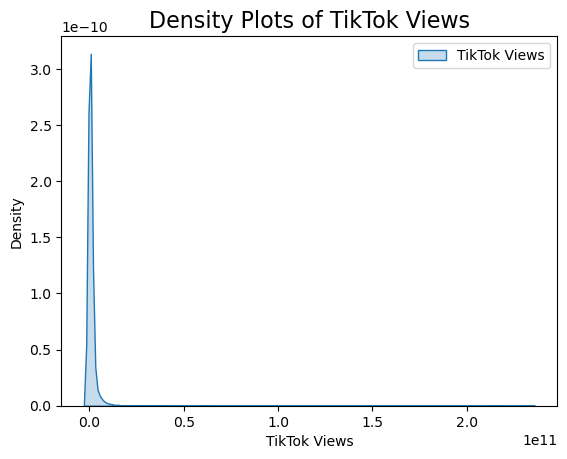

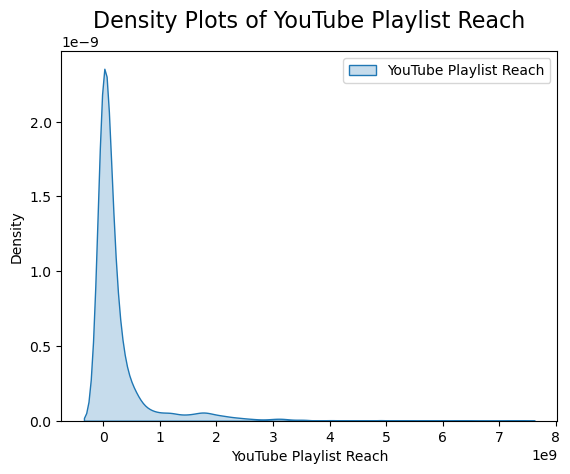

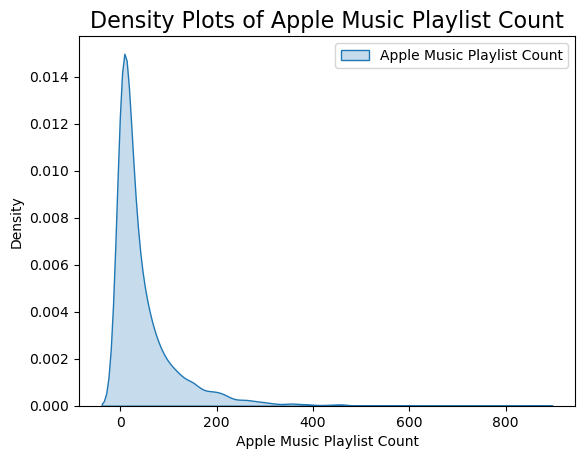

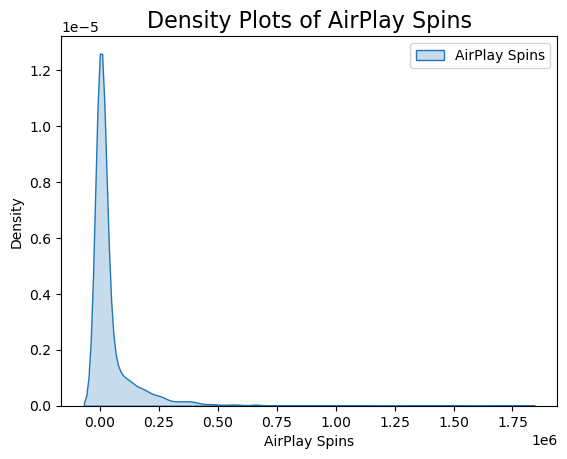

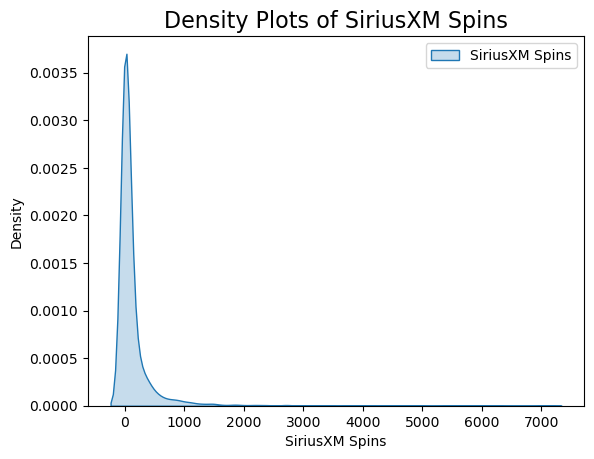

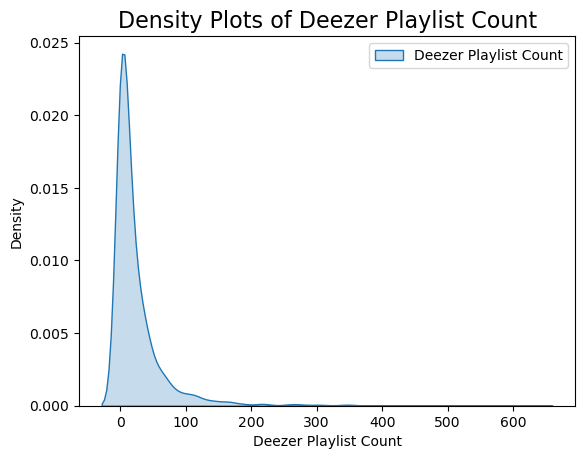

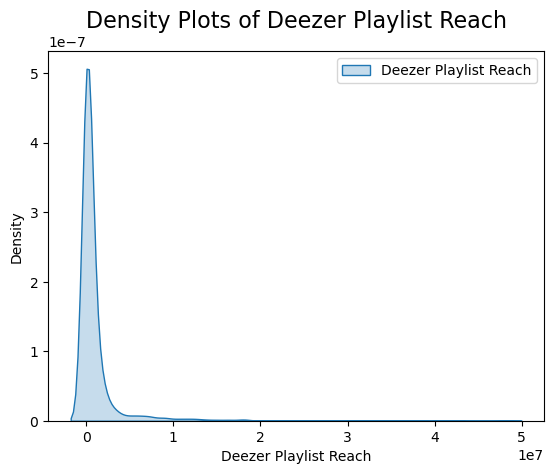

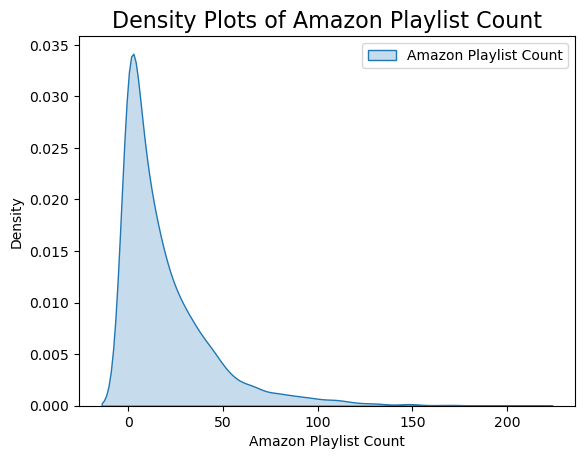

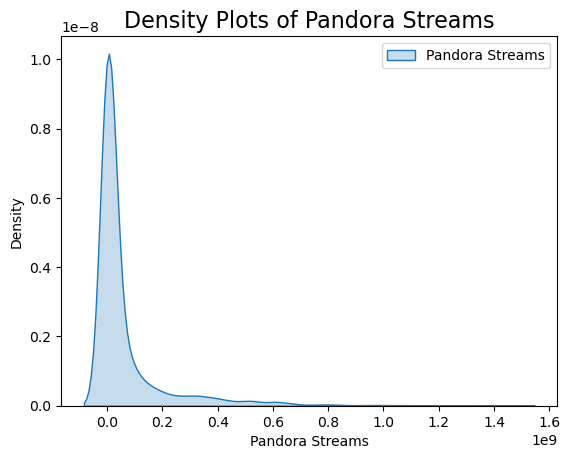

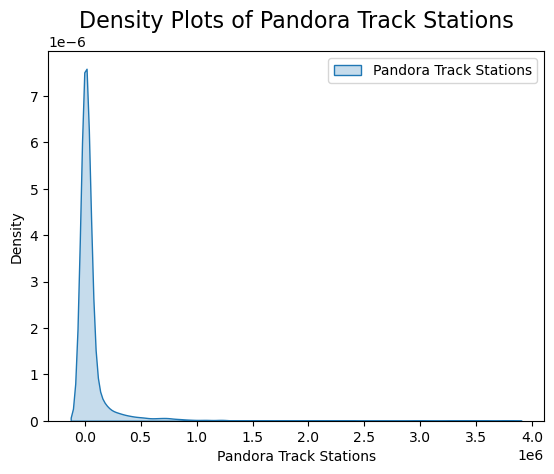

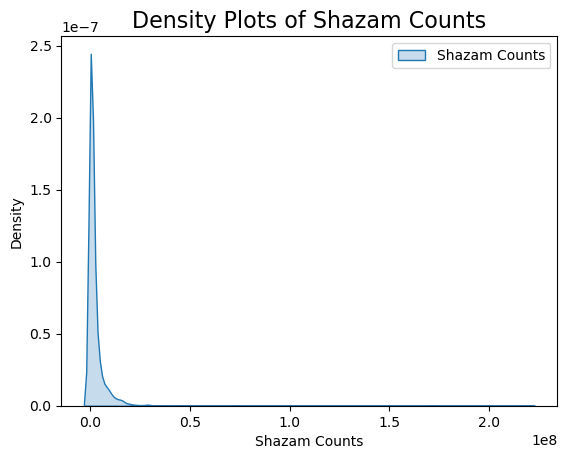

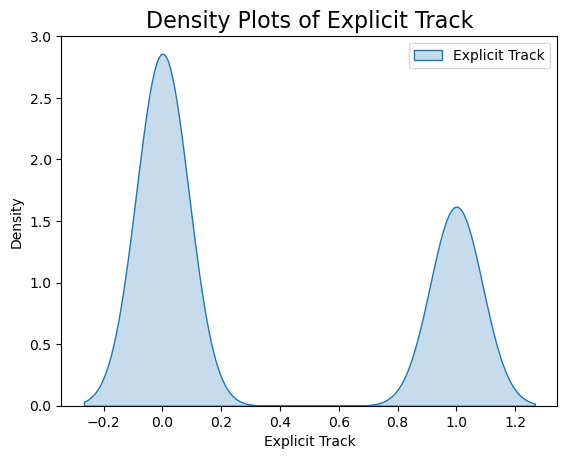

In [214]:
# Create density plots for numerical features
plt.figure(figsize=(10, 7))
for column in numerical_columns.columns:
    sns.kdeplot(spotify_filled_data[column], label=column, fill=True)
    plt.title('Density Plots of ' + column, fontsize=16)
    plt.legend()
    plt.show()

#### > Create bar plots for categorical features to visualize the frequency of categories.

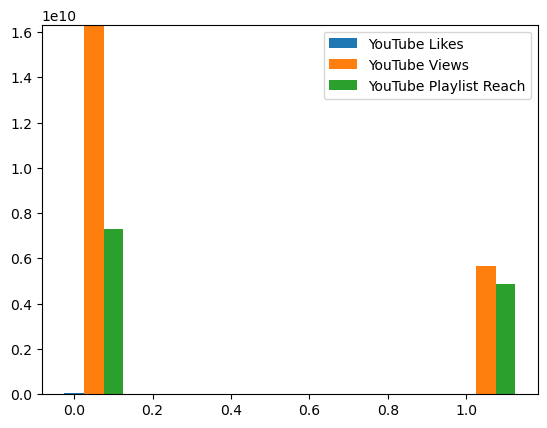

In [125]:
maxx = [spotify_filled_data['YouTube Likes'].max(), spotify_filled_data['YouTube Views'].max(), spotify_filled_data['YouTube Playlist Reach'].max()]
sorted_numbers_desc = sorted(maxx, reverse=True)
maxValue = sorted_numbers_desc[0]

x = spotify_filled_data['Explicit Track']
y1 = spotify_filled_data['YouTube Likes']
y2 = spotify_filled_data['YouTube Views']
y3 = spotify_filled_data['YouTube Playlist Reach']
width = 0.05
plt.bar(x, y1, width, label = 'YouTube Likes')
plt.bar(x + width, y2, width, label = 'YouTube Views')
plt.bar(x + width + width, y3, width, label = 'YouTube Playlist Reach')
plt.legend()
plt.ylim(0, maxValue + 1000)
plt.show()

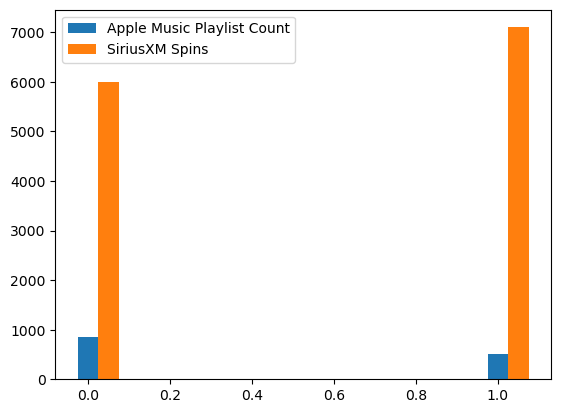

In [131]:
x = spotify_filled_data['Explicit Track']
y1 = spotify_filled_data['Apple Music Playlist Count']
#y2 = spotify_filled_data['AirPlay Spins']
y3 = spotify_filled_data['SiriusXM Spins']
width = 0.05
plt.bar(x, y1, width, label = 'Apple Music Playlist Count')
#plt.bar(x + width, y2, width, label = 'AirPlay Spins')
plt.bar(x + width, y3, width, label = 'SiriusXM Spins')
plt.legend()
plt.show()

In [141]:
import heapq

maxx = [spotify_filled_data['YouTube Likes'].min(), spotify_filled_data['YouTube Views'].min(), spotify_filled_data['YouTube Playlist Reach'].min()]
sorted_numbers = sorted(maxx, reverse=False)
minValue = sorted_numbers[2]
print("minValue : " , minValue)

unique_values = set(spotify_filled_data['YouTube Likes'])
heapq.nsmallest(2, unique_values)[1]


minValue :  0


25

In [127]:
maxx = [spotify_filled_data['YouTube Likes'].max(), spotify_filled_data['YouTube Views'].max(), spotify_filled_data['YouTube Playlist Reach'].max()]
sorted_numbers_desc = sorted(maxx, reverse=True)
maxValue = sorted_numbers_desc[0]
numbersToSkip = round(maxValue / 50)
xx = np.arange(0, maxValue+50, numbersToSkip)
xx

array([          0,   326455131,   652910262,   979365393,  1305820524,
        1632275655,  1958730786,  2285185917,  2611641048,  2938096179,
        3264551310,  3591006441,  3917461572,  4243916703,  4570371834,
        4896826965,  5223282096,  5549737227,  5876192358,  6202647489,
        6529102620,  6855557751,  7182012882,  7508468013,  7834923144,
        8161378275,  8487833406,  8814288537,  9140743668,  9467198799,
        9793653930, 10120109061, 10446564192, 10773019323, 11099474454,
       11425929585, 11752384716, 12078839847, 12405294978, 12731750109,
       13058205240, 13384660371, 13711115502, 14037570633, 14364025764,
       14690480895, 15016936026, 15343391157, 15669846288, 15996301419,
       16322756550], dtype=int64)

In [15]:
# Escape special characters in categorical columns (optional)
for column in categorical_columns:
    spotify_filled_data[column] = spotify_filled_data[column].str.replace(r'[^a-zA-Z0-9 ]', '', regex=True)
    print("column : ", spotify_filled_data[column])


column :  0                MILLION DOLLAR BABY
1                        Not Like Us
2         i like the way you kiss me
3                            Flowers
4                            Houdini
                    ...             
4554               For the Last Time
4555                Dil Meri Na Sune
4556              Grace feat 42 Dugg
4557             Nashe Si Chadh Gayi
4558    Me Acostumbre feat Bad Bunny
Name: Track, Length: 4559, dtype: object
column :  0        Million Dollar Baby  Single
1                        Not Like Us
2         I like the way you kiss me
3                    Flowers  Single
4                            Houdini
                    ...             
4554               For the Last Time
4555    Dil Meri Na Sune From Genius
4556                         My Turn
4557           November Top 10 Songs
4558    Me Acostumbre feat Bad Bunny
Name: Album Name, Length: 4559, dtype: object
column :  0        Tommy Richman
1       Kendrick Lamar
2              Artemas


#### Use boxplots to identify outliers and understand the spread of the data.

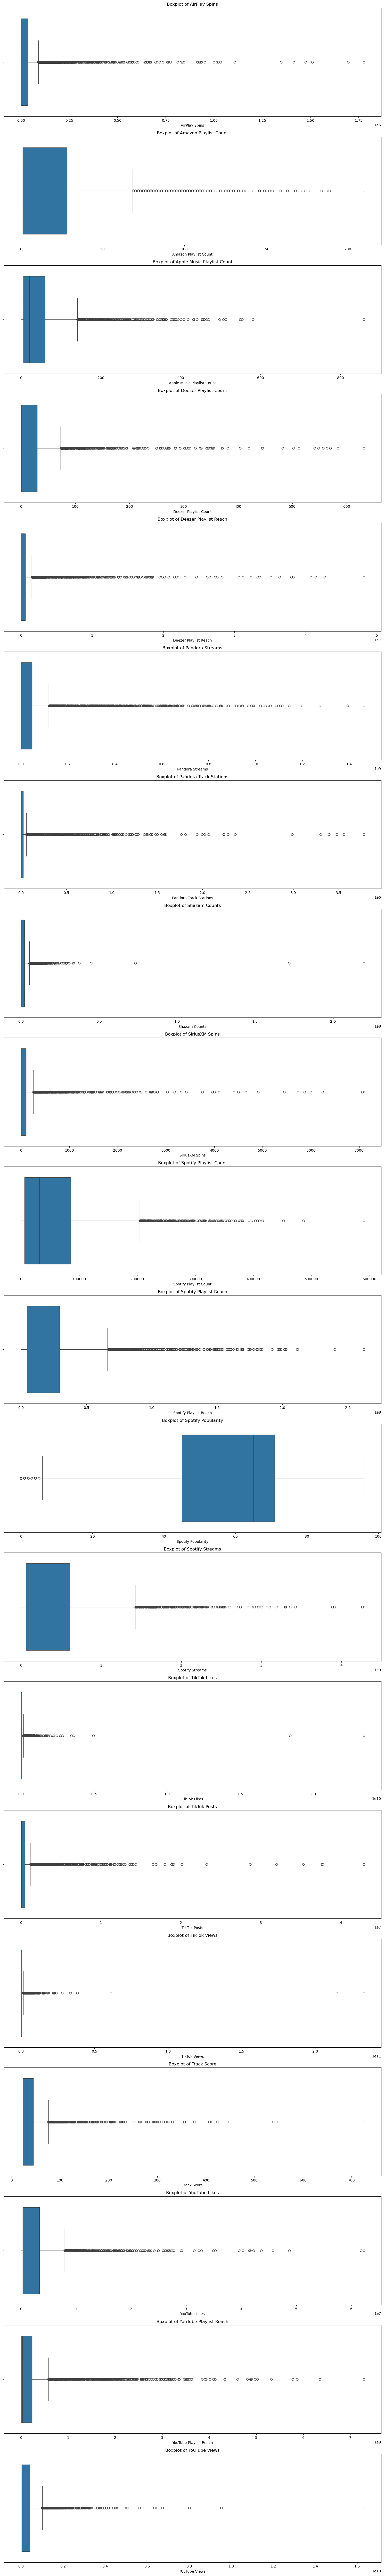

In [216]:
plt.figure(figsize=(15, len(numeric_columns) * 5))

# Loop through each numeric column and create a boxplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(x=spotify_filled_data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

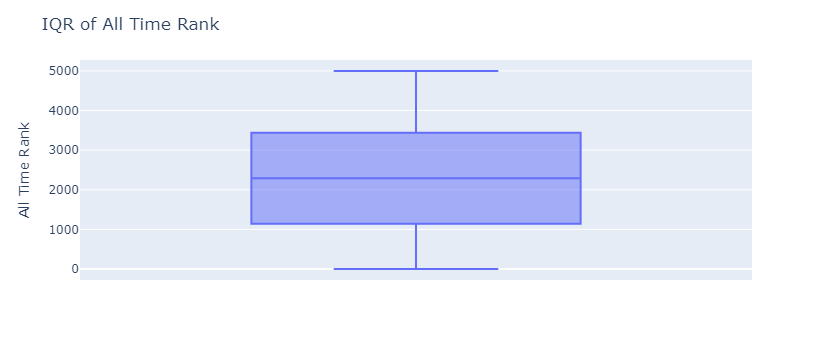

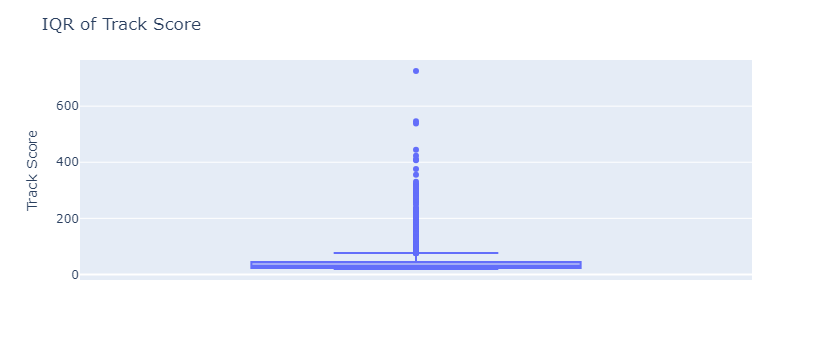

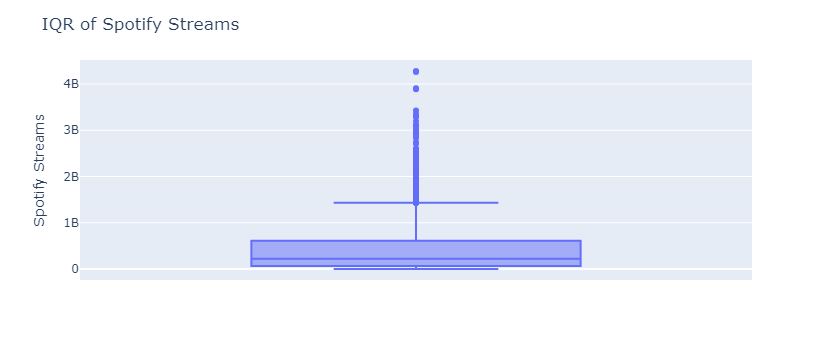

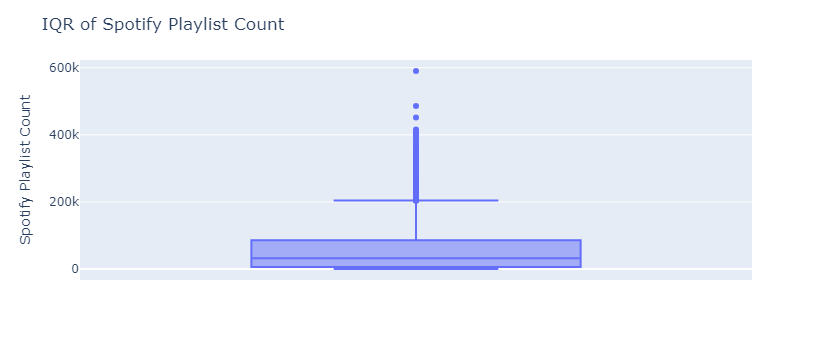

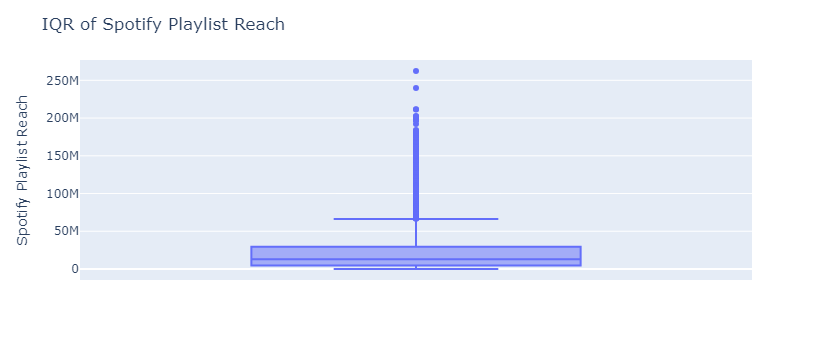

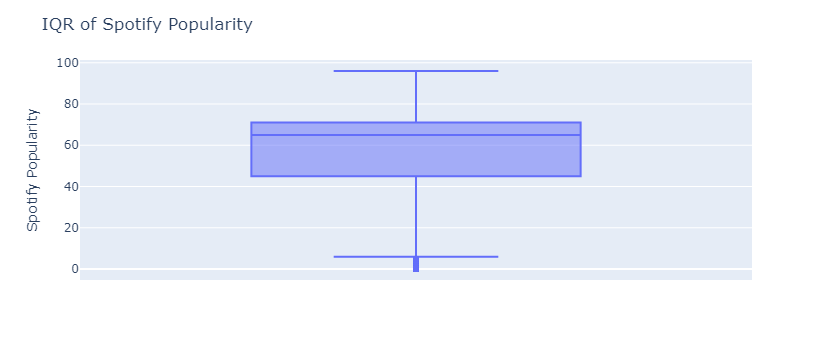

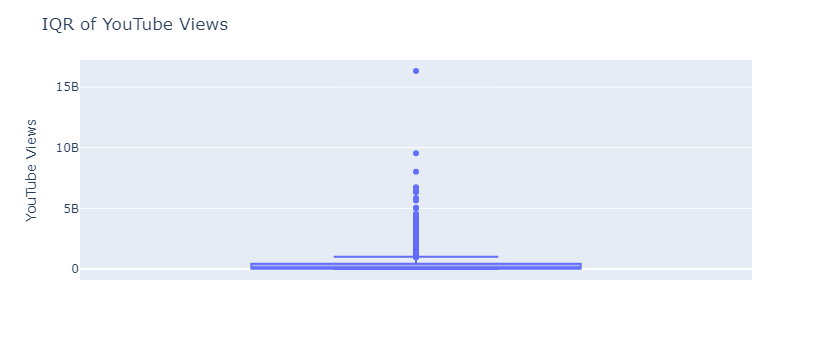

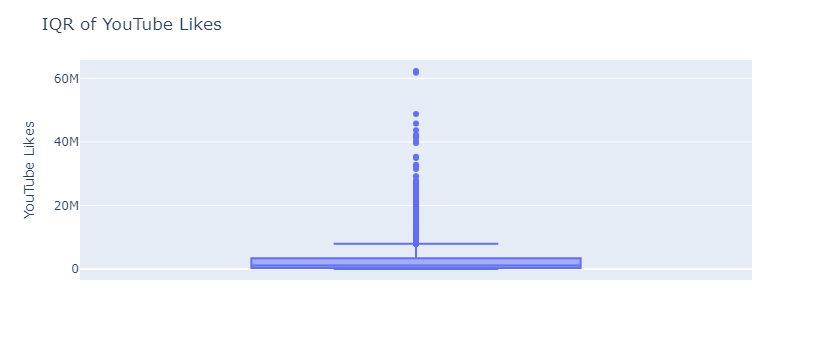

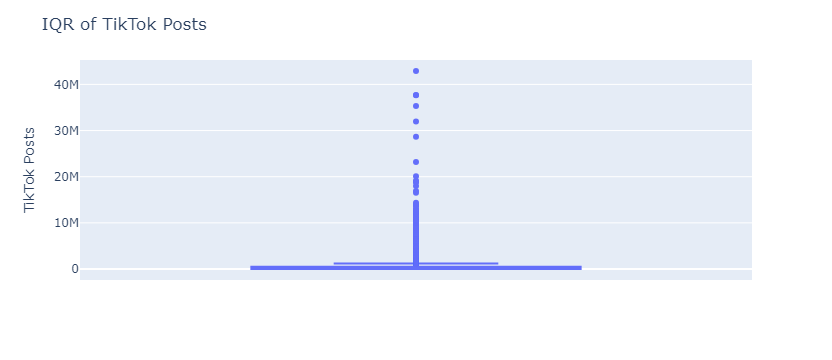

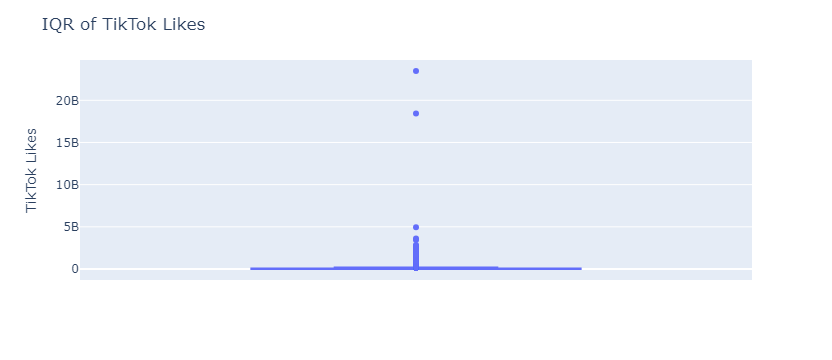

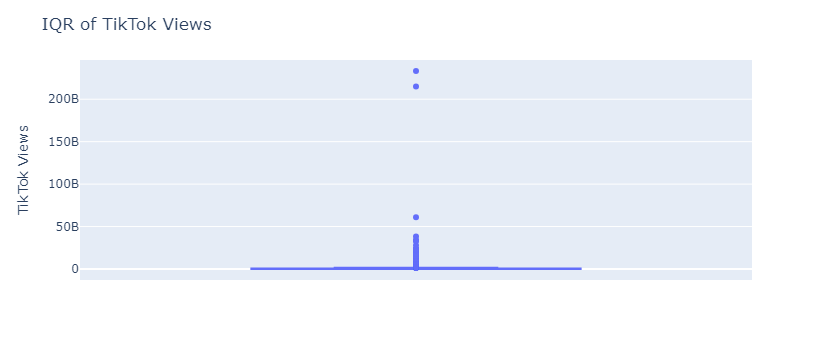

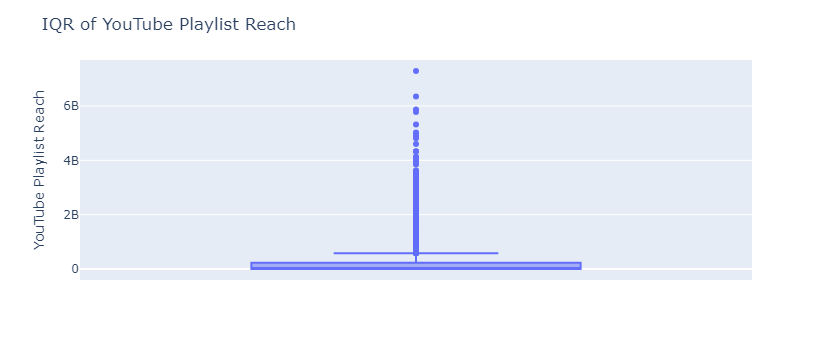

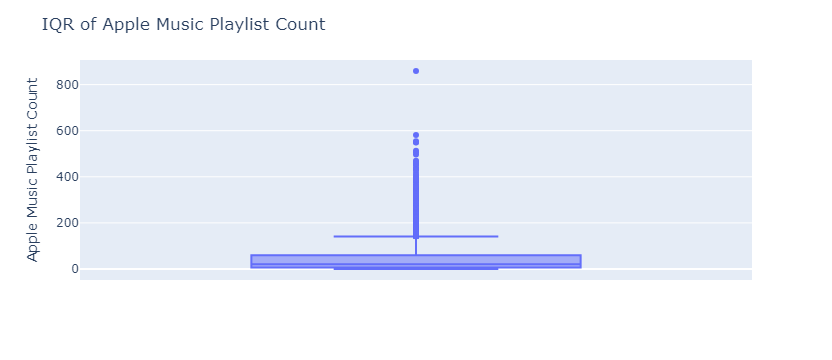

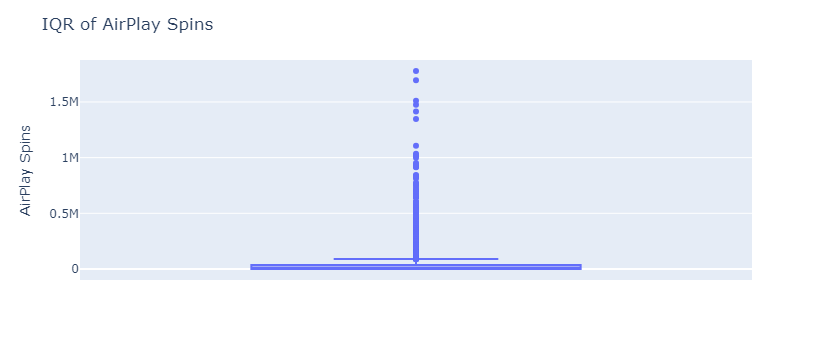

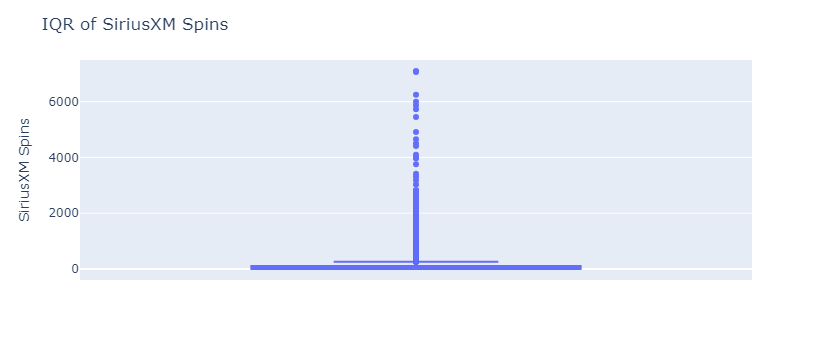

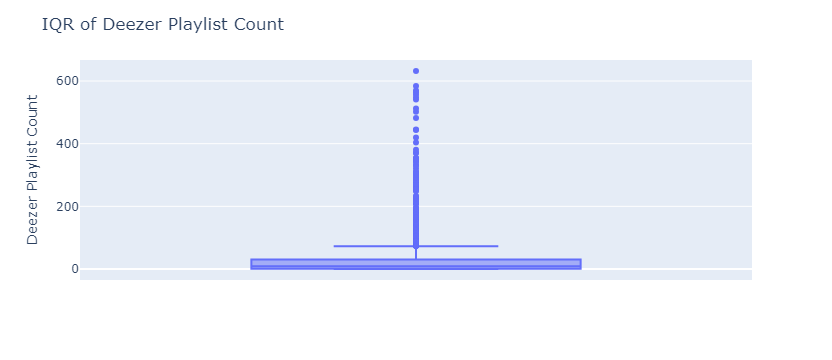

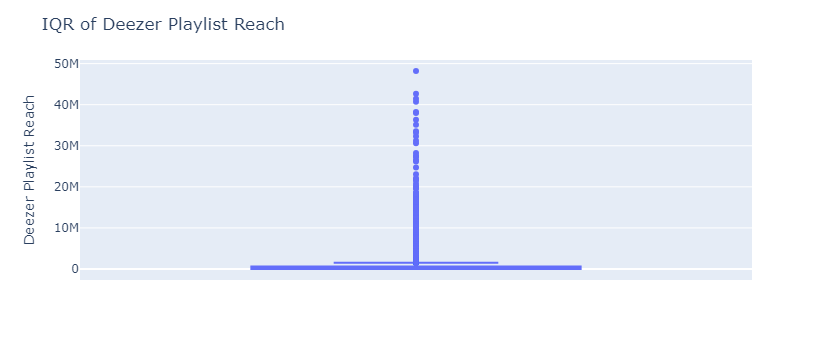

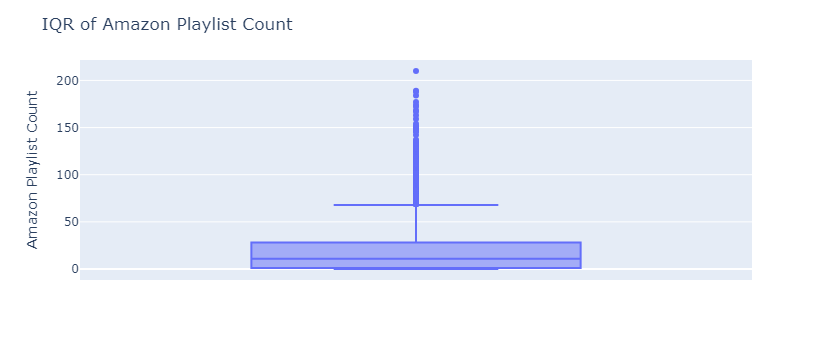

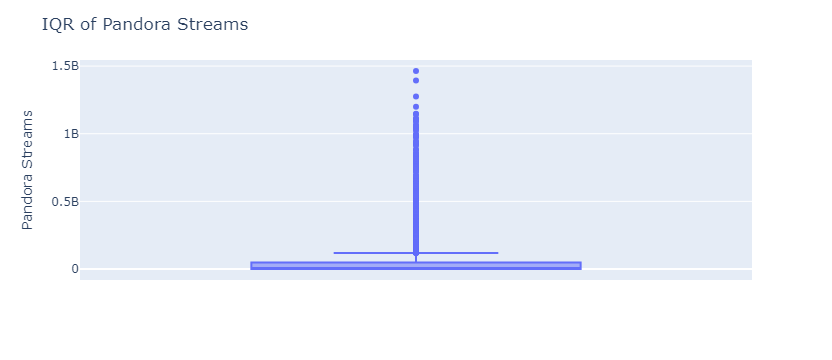

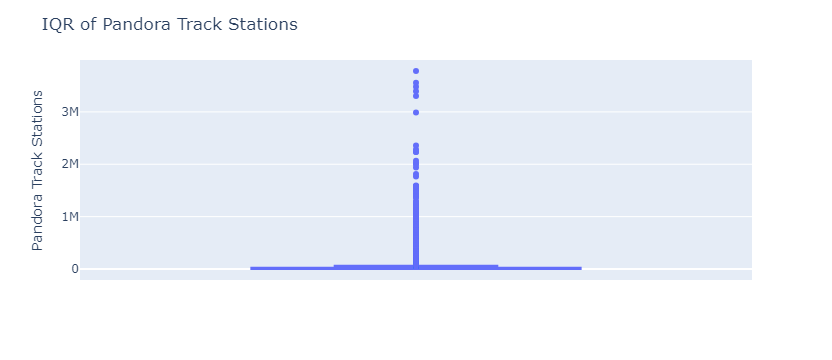

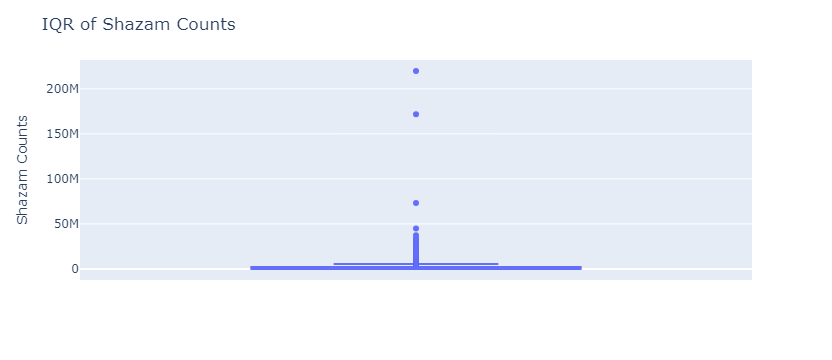

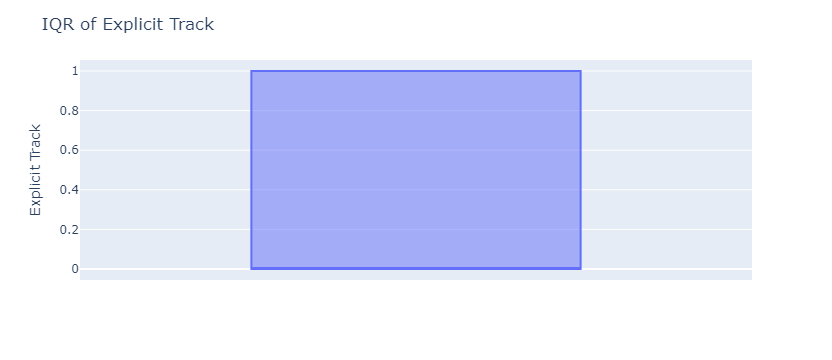

In [187]:
numeric_columns = spotify_filled_data.select_dtypes(include=['int64', 'float64', 'Int64']).columns

for clms in numeric_columns :
    fig = px.box(spotify_filled_data, y=clms)
    fig.update_layout(title_text='IQR of '+clms)
    fig.show()

#### Create scatter plots to explore relationships between numerical features.

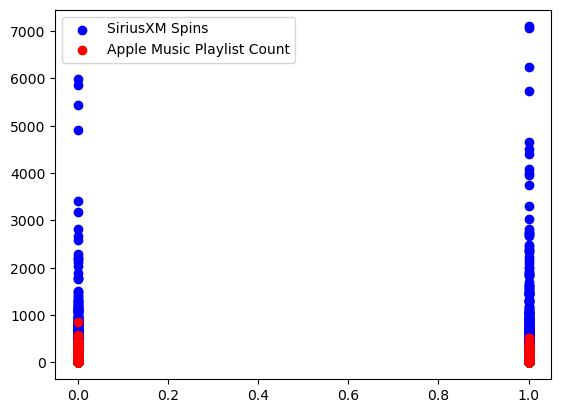

In [218]:
plt.scatter(x = 'Explicit Track', y='SiriusXM Spins', label='SiriusXM Spins', color='b', data=spotify_filled_data)
plt.scatter(x = 'Explicit Track', y='Apple Music Playlist Count', label='Apple Music Playlist Count', color='r', data=spotify_filled_data)
plt.legend()
plt.show()

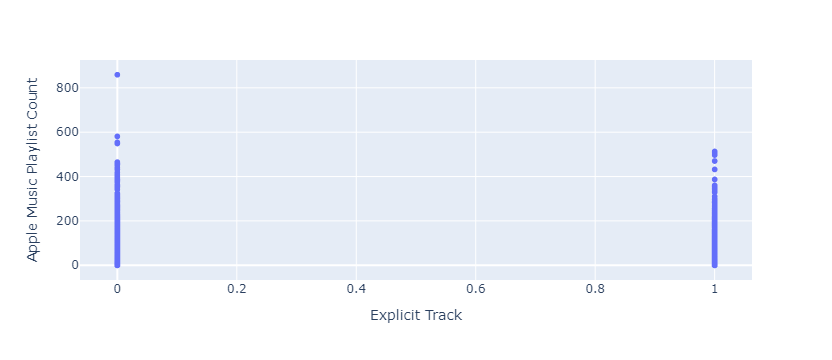

In [220]:
fig = px.scatter(spotify_filled_data, x= 'Explicit Track', y='SiriusXM Spins')
fig = px.scatter(spotify_filled_data, x= 'Explicit Track', y='Apple Music Playlist Count')
fig.show()

#### Use heatmaps to visualize correlations between numerical features.

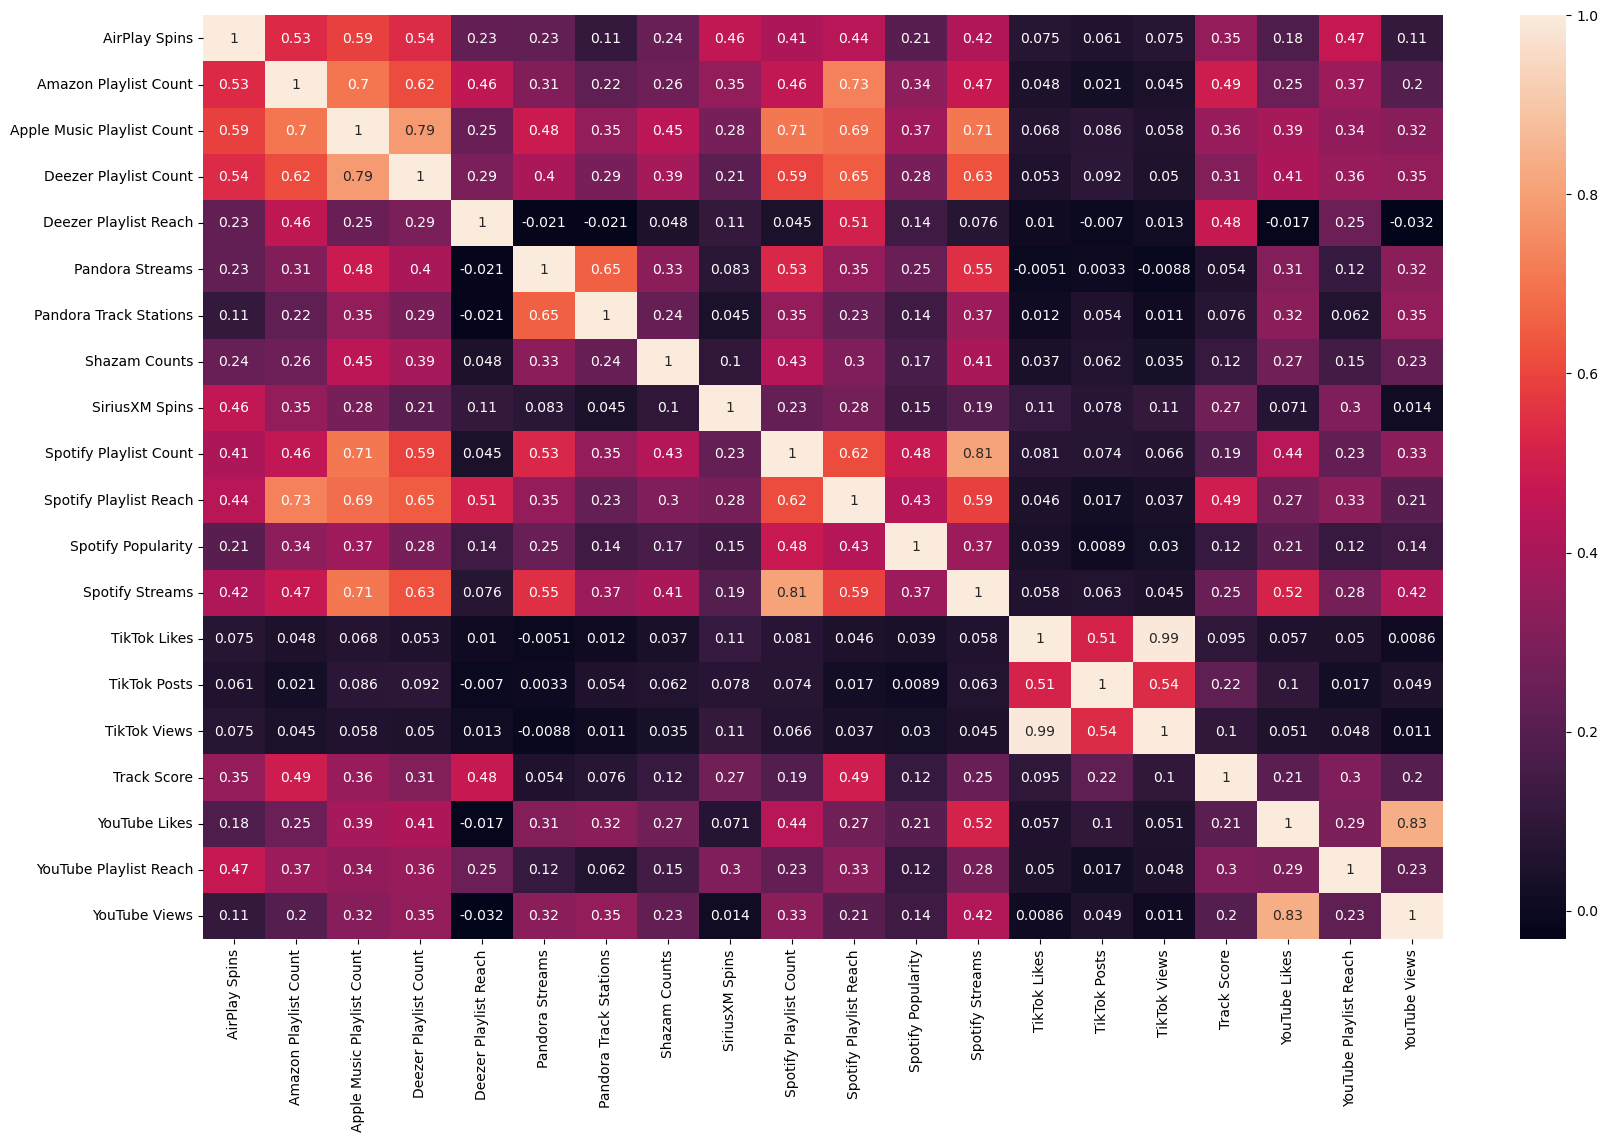

In [231]:
plt.figure(figsize=(20, 12))
sns.heatmap(spotify_filled_data[numeric_columns].corr(), annot = True)
plt.show()

### iii. GroupAnalysis:

#### Perform group-by operations to aggregate data based on categorical features.

In [243]:

grouped_data1 = spotify_filled_data.groupby(['Artist']).agg({
    'Spotify Streams': ['sum', 'mean'],
    'Spotify Playlist Reach': 'count',
    'Spotify Popularity': 'mean'
}).reset_index()

grouped_data1

Artist Spotify Streams  \
                                                                    sum   
0                                                  "XY"               0   
1                                             $OHO BANI        54065563   
2                                           $uicideboy$      1697447430   
3                                                   &ME        34601626   
4                                              (G)I-DLE       876938452   
...                                                 ...             ...   
1995  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½ Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã...         2409532   
1996  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½(Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã...          548408   
1997               Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½         4943057   
1998  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½ Ã½Ã...          456034   
1999   Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½         3225791   

                  Spotify Playlist Reach Spotify Popularity  
             mean                  count               mean  
0             0.0                      1               0.00  
1      54065563.0                      1              73.00  
2     188605270.0                      9              63.00  
3      34601626.0                      1              65.00  
4     219234613.0                      4              51.25  
...           ...                    ...                ...  
1995    2409532.0                      1              52.00  
1996     548408.0                      1              24.00  
1997    4943057.0                      1              46.00  
1998     456034.0                      1               0.00  
1999    3225791.0                      1               0.00  

[2000 rows x 5 columns]

In [245]:

grouped_data2 = spotify_filled_data.groupby(['Explicit Track']).agg({
    'Spotify Streams': ['sum', 'mean'],
    'Spotify Playlist Reach': 'count',
    'Spotify Popularity': 'mean'
}).reset_index()

grouped_data2

Explicit Track Spotify Streams               Spotify Playlist Reach  \
                             sum          mean                  count   
0              0   1251009695011  4.296050e+08                   2912   
1              1    728652027712  4.424117e+08                   1647   

  Spotify Popularity  
                mean  
0          51.589973  
1          54.485732

In [248]:
grouped_data3 = spotify_filled_data.groupby('Artist')['Album Name'].sum().to_frame().reset_index()
grouped_data3

Artist  \
0                                                  "XY"   
1                                             $OHO BANI   
2                                           $uicideboy$   
3                                                   &ME   
4                                              (G)I-DLE   
...                                                 ...   
1995  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½ Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã...   
1996  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½(Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã...   
1997               Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½   
1998  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½ Ã½Ã...   
1999   Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½   

                                             Album Name  
0                                    Relyt Conections 3  
1                             ZEIT, DASS SICH WAS DREHT  
2     Us Vs. ThemSTOP STARING AT THE SHADOWSSing Me ...  
3                           The Rapture Pt.III - Single  
4                           I feelI NEVER DIEI loveWife  
...                                                 ...  
1995  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½...  
1996  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½ 3Ã½Ã½Ã½Ã½Ã½Ã½ Ã...  
1997  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½...  
1998  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½ Ã½Ã...  
1999  Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½Ã½...  

[2000 rows x 2 columns]

### iv. Feature Analysis

#### Identify and analyze key features that might be important for understanding the dataset.

#### Explore relationships between features using pair plots, correlation matrices, and pivot tables.

#### Perform any additional analyses that might be relevant to your dataset (e.g., time series analysis for time-related data).

#  5. Advanced Python Techniques

# 6. Insights and Conclusions

# 7. Documentation and Presentation